In [2]:
import os
if(os.path.exists("./dqn_example.py")):
    os.chdir("..")
    
import matplotlib.pyplot as plt
import pandas as pd
from absl import flags, app

from run import eval

C:\Users\Pascal\AppData\Roaming\Python\Python39\site-packages\tensorboardX\proto\resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\Pascal\AppData\Roaming\Python\Python39\site-packages\tensorboardX\proto\resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\Pascal\AppData\Roaming\Python\Python39\site-packages\tensorboardX\proto\resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or qu

cuda


In [5]:
root = './runs/'
folder = 'learning_rate/'
#folder = 'warmup/'
n_evals = 100

eval_results = dict()
def main(argv):
    if(not os.path.exists(os.path.join(root, folder, 'eval.csv'))):
        eval_dirs = os.listdir(f'{root}{folder}')
        for eval_dir in eval_dirs:
            eval_dir = os.path.join(folder, eval_dir, 'checkpoint-last.pt')
            eval_results[eval_dir] = eval(eval_dir, n_evals)
            df = pd.DataFrame.from_dict(eval_results)
            df.to_csv(os.path.join(root, folder, 'eval.csv'))
            quit()
        else:
            quit()

app.run(main, argv = None)

SystemExit: 

c:\Program Files\Python39\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [60]:
def show_boxplot(folder : str, title : str, ylabel :str, labels : list = None):
    df = pd.read_csv(os.path.join(root, folder, 'eval.csv'), index_col=0)
    fig, axs = plt.subplots(figsize=(22, 5))
    axs.set_title(title)
    if(labels == None):
        labels = df.columns
    elif(isinstance(labels, dict)):
        labels = labels.values()
    elif(isinstance(labels[0], float)):
        df.columns = labels
        df = df.sort_index(axis=1)
        labels = df.columns
    axs.boxplot(df, labels=labels, vert=False)
    axs.set_xlabel("reward")
    axs.set_ylabel(ylabel)
    plt.show()

def show_hists(folder : str, title : str, ylabel :str, labels : list = None):
    df = pd.read_csv(os.path.join(root, folder, 'eval.csv'), index_col=0)
    fig, axs = plt.subplots(6, 1, figsize=(22, 10))
    axs = axs.flatten()
    axs[0].set_title(title)
    if(labels == None):
        labels = df.columns
    elif(isinstance(labels, dict)):
        labels = labels.values()
    elif(isinstance(labels[0], float)):
        df.columns = labels
        df = df.sort_index(axis=1)
        labels = df.columns
    for i in range(0, df.shape[1], 1):
        i_data = df.shape[1]-1 - i
        axs[i].hist(df.iloc[:, i_data], bins=20)
        axs[i].set_xlabel("reward")
        axs[i].set_ylabel(labels[i_data])
    plt.show()

def get_labels(folder, key):
    labels = dict()
    # extract learning_rates from flags.txt
    date_dirs = os.listdir(os.path.join(root, folder))
    for date_dir in date_dirs:
        flags_dir = os.path.join(root, folder, date_dir, 'flags.txt')
        if(os.path.exists(flags_dir)):
            with open(flags_dir, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    if(line.startswith(f'--{key}')):
                        labels[date_dir] = line.split('=')[1].strip()
    return labels
    

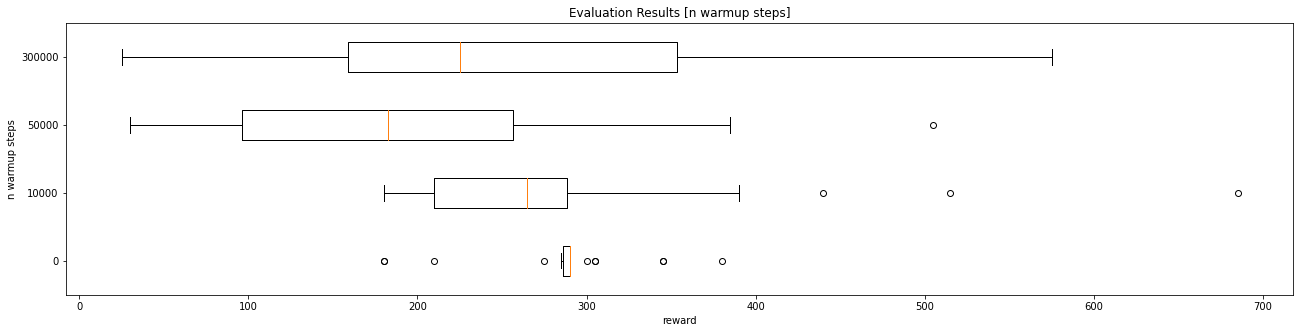

In [84]:
show_boxplot('warmup', 'Evaluation Results [n warmup steps]', "n warmup steps", get_labels('warmup', 'warmup_steps')) # ['0', '10k', '50k', '300k']

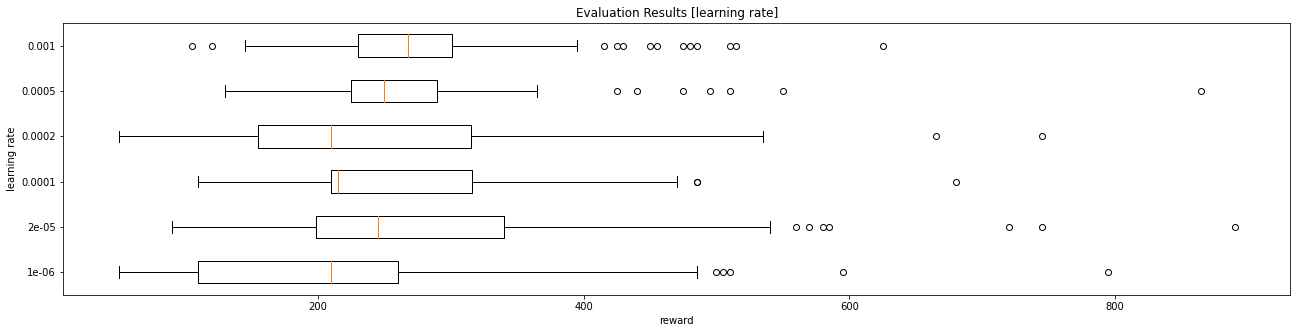

In [6]:
show_boxplot('learning_rate', 'Evaluation Results [learning rate]', "learning rate", [float(x) for x in get_labels('learning_rate', 'learning_rate').values()])

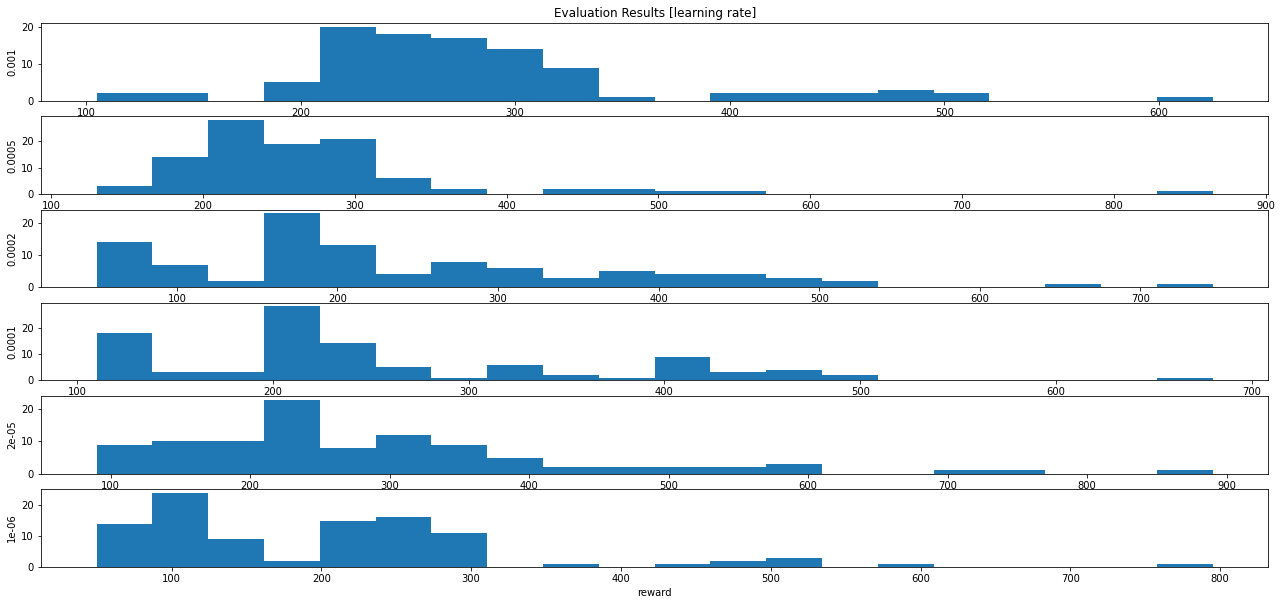

In [61]:
show_hists('learning_rate', 'Evaluation Results [learning rate]', "learning rate", [float(x) for x in get_labels('learning_rate', 'learning_rate').values()])